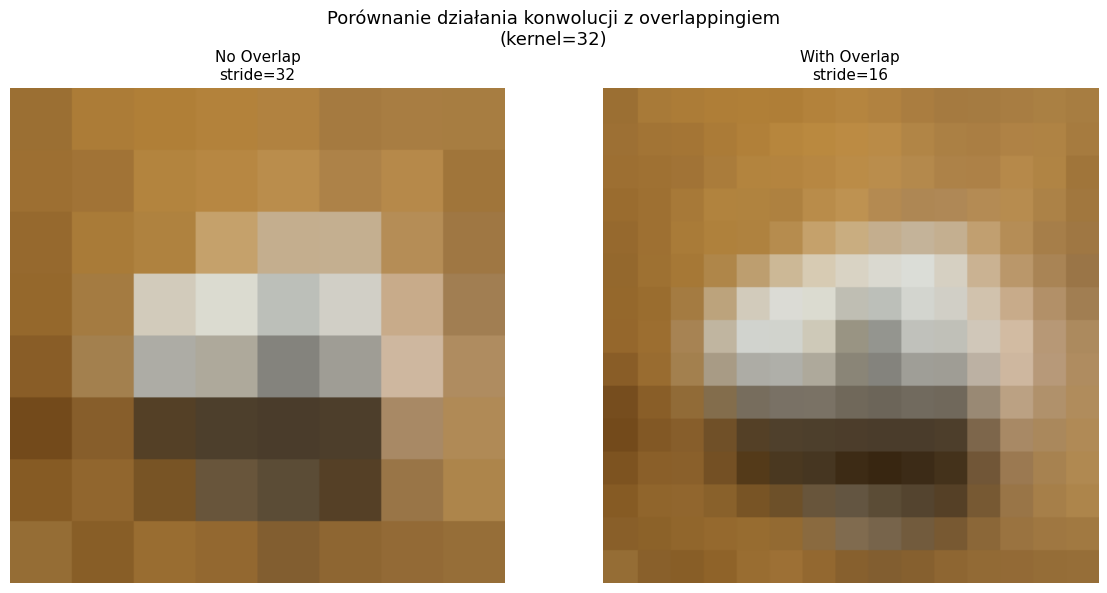

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === Ustawienia ===
image_path = r"D:\DataSetTest2\mug_partitioned\train\IMG_E8342.png"
kernel_size = 32
stride_no_overlap = 32
stride_overlap = 16

# === Wczytaj i przeskaluj obraz ===
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(f"Nie znaleziono: {image_path}")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (256, 256))

# === Funkcja tworząca kolorową „mapę cech” ===
def color_feature_map(img, kernel_size, stride):
    h, w, _ = img.shape
    out_h = (h - kernel_size) // stride + 1
    out_w = (w - kernel_size) // stride + 1
    out_img = np.zeros((out_h, out_w, 3), dtype=np.uint8)

    for i in range(out_h):
        for j in range(out_w):
            y = i * stride
            x = j * stride
            patch = img[y:y + kernel_size, x:x + kernel_size]
            avg_color = patch.mean(axis=(0, 1))
            out_img[i, j] = avg_color

    # Każdy patch jako duży piksel
    return cv2.resize(out_img, (256, 256), interpolation=cv2.INTER_NEAREST)

# === Tworzymy dwie wersje: bez i z overlapingiem ===
featmap_no_overlap = color_feature_map(img, kernel_size, stride_no_overlap)
featmap_overlap = color_feature_map(img, kernel_size, stride_overlap)

# === Wykres porównawczy ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(featmap_no_overlap)
ax1.set_title(f"No Overlap\nstride={stride_no_overlap}", fontsize=11)
ax1.axis('off')

ax2.imshow(featmap_overlap)
ax2.set_title(f"With Overlap\nstride={stride_overlap}", fontsize=11)
ax2.axis('off')

plt.suptitle(f"Porównanie działania konwolucji z overlappingiem\n(kernel={kernel_size})", fontsize=13)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig("Resources/overlap_visualized_colored.svg", format='svg')
plt.show()
